In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
## read data
test_df = pd.read_csv('hw_data/test.csv')
test_df.head()

,dates,SKU
0,2018-12-17,98255
1,2018-12-21,98255
2,2018-12-22,98255
3,2018-12-23,98255
4,2018-12-24,98255


In [218]:
test_df.shape

(175, 2)

In [219]:
## read data
fst_gr_sku = pd.read_csv('hw_data/first_group_sku.csv')
sec_gr_sku = pd.read_csv('hw_data/second_group_sku.csv')
trd_gr_sku = pd.read_csv('hw_data/third_group_sku.csv')
conc_df = pd.read_csv('hw_data/conc_df.csv')
promo_df = pd.read_csv('hw_data/promo_1510002.csv')

sku_dict = pd.read_csv('hw_data/sku_dict.csv')
sku_dict.head()

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01 00:00:00
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01 00:00:00
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01 00:00:00
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01 00:00:00
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01 00:00:00


# EDA

In [220]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dates   175 non-null    object
 1   SKU     175 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [221]:
fst_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,32950,422.975,3
1,2018-04-24,32950,429.275,3
2,2018-04-27,32950,435.100,3
3,2018-04-30,32950,NaN,1
4,2018-05-03,32950,440.950,2


In [185]:
sec_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-19,10334,92.890,10
1,2018-04-20,10334,92.890,11
2,2018-04-21,10334,92.890,10
3,2018-04-22,10334,92.890,12
4,2018-04-23,10334,92.456,10


In [186]:
trd_gr_sku.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-22,11050,101.575,10
1,2018-04-23,11050,101.344,9
2,2018-04-25,11050,101.344,9
3,2018-04-26,11050,101.344,9
4,2018-04-27,11050,101.344,10


In [228]:
test_df.SKU.unique()

array([98255, 68211, 60870, 32950, 24125, 69997, 57561, 78833, 43678,
       11050, 72784, 64619, 17812, 83329, 89272, 90611, 36096, 80631,
       54404, 84395, 19632, 38767, 80308, 10334, 49661])

In [229]:
conc_df.SKU.isin(test_df.SKU)

0       True
1       True
2       True
3       True
4       True
        ... 
3004    True
3005    True
3006    True
3007    True
3008    True
Name: SKU, Length: 3009, dtype: bool

In [189]:
conc_df.head()

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.69400
1,84395,2019,18,2,164.69400
2,84395,2019,18,3,134.50010
3,84395,2019,22,1,165.19800
4,84395,2019,22,2,136.28835


In [190]:
promo_df.SKU.isin(test_df.SKU) # True
promo_df.head()

,year,week_num,SKU,discount
0,2019,1,90611,0.9
1,2019,2,10334,0.9
2,2019,3,68211,0.9
3,2019,4,10334,0.9
4,2019,5,72784,0.8


In [191]:
ttl_sku_df = fst_gr_sku.append(sec_gr_sku).append(trd_gr_sku)
ttl_sku_df['dates'] = pd.to_datetime(ttl_sku_df['dates'])
ttl_sku_df['year'] = ttl_sku_df.dates.dt.year
ttl_sku_df['week_num'] = ttl_sku_df.dates.dt.week
ttl_sku_df['date_week'] = pd.to_datetime((ttl_sku_df.year.astype(str) + \
    ttl_sku_df.week_num.astype(str) + '0'), format='%Y%W%w')
ttl_sku_df.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,dates,SKU,price_per_sku,num_purchases,year,week_num,date_week
0,2018-04-20,32950,422.975,3,2018,16,2018-04-22
1,2018-04-24,32950,429.275,3,2018,17,2018-04-29
2,2018-04-27,32950,435.100,3,2018,17,2018-04-29
3,2018-04-30,32950,NaN,1,2018,18,2018-05-06
4,2018-05-03,32950,440.950,2,2018,18,2018-05-06


In [192]:
ttl_sku_df = ttl_sku_df.merge(sku_dict, left_on = 'SKU', right_on = 'sku_id', how='left').merge(\
    conc_df, on = ['SKU', 'year', 'week_num'], how='left', suffixes=('', '_comp')).merge(\
    promo_df, on = ['SKU', 'year', 'week_num'], how='left')

In [193]:
ttl_sku_df.head()

,dates,SKU,price_per_sku,num_purchases,year,week_num,date_week,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date,ret_net_code,price_per_sku_comp,discount
0,2018-04-20,32950,422.975,3,2018,16,2018-04-22,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,NaN,NaN,NaN
1,2018-04-24,32950,429.275,3,2018,17,2018-04-29,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,NaN,NaN,NaN
2,2018-04-27,32950,435.100,3,2018,17,2018-04-29,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,NaN,NaN,NaN
3,2018-04-30,32950,NaN,1,2018,18,2018-05-06,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,NaN,NaN,NaN
4,2018-05-03,32950,440.950,2,2018,18,2018-05-06,32950,FE,FE1,FE100,FE10000,AO59EQ,3FAIRJ4W,2018-01-15,2200-01-01 00:00:00,NaN,NaN,NaN


## fill na in price

In [222]:
d={'dd': (1,None,2)}
pd.DataFrame(d).fillna(method='ffill')

,dd
0,1.0
1,1.0
2,2.0


In [223]:
def fillna_fw(x):
#     d={'ddt': (1,None,2)}
#     return x.fillna(method='ffill')
    return x

In [224]:
# df.groupby("name").transform(lambda x: x.fillna(x.mean()))
# ttl_sku_df.groupby('SKU', as_index=False).apply(price_per_sku, fillna_fw)
ttl_sku_df["price_per_sku"] = ttl_sku_df.groupby("SKU", as_index=False \
    )['price_per_sku'].transform(lambda x: x.fillna(method='ffill'))

In [225]:
ttl_sku_df.shape

(20062, 20)

In [226]:
ttl_sku_df['price_per_sku_real'] = ttl_sku_df['price_per_sku']
ttl_sku_df['discount'].describe()
ttl_sku_df.loc[ttl_sku_df.discount > 0, 'price_per_sku_real'] = \
    (ttl_sku_df.loc[ttl_sku_df.discount > 0, 'price_per_sku'] / \
     ttl_sku_df.loc[ttl_sku_df.discount > 0, 'discount'])
ttl_sku_df['price_per_sku_real'].describe()

count    20062.000000
mean       120.028684
std         40.746719
min         63.000000
25%         93.156000
50%        117.643000
75%        136.370000
max        486.325000
Name: price_per_sku_real, dtype: float64

In [227]:
ttl_sku_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20062 entries, 0 to 20061
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   dates               20062 non-null  datetime64[ns]
 1   SKU                 20062 non-null  int64         
 2   price_per_sku       20062 non-null  float64       
 3   num_purchases       20062 non-null  int64         
 4   year                20062 non-null  int64         
 5   week_num            20062 non-null  int64         
 6   date_week           20062 non-null  datetime64[ns]
 7   sku_id              20062 non-null  int64         
 8   fincode             20062 non-null  object        
 9   ui1_code            20062 non-null  object        
 10  ui2_code            20062 non-null  object        
 11  ui3_code            20062 non-null  object        
 12  vendor              20062 non-null  object        
 13  brand_code          20062 non-null  object    

## explore 1 sku 98255

In [157]:
sku_98255 = ttl_sku_df.loc[ttl_sku_df.SKU == 98255]
sku_98255_test = test_df.loc[test_df.SKU == 98255]
sku_98255_pivot = sku_98255.pivot_table(index='dates', values=['price_per_sku', 'price_per_sku_real'], columns='SKU')
sku_98255_pivot.head()

,price_per_sku,price_per_sku_real
SKU,98255,98255
dates,,
2018-07-29,65.639,65.639
2018-07-30,65.940,65.940
2018-07-31,65.940,65.940
2018-08-02,65.940,65.940
2018-08-04,65.940,65.940


In [158]:
sku_98255.set_index(sku_98255.dates, inplace=True)
sku_98255['SKU'].head()

dates
2018-07-29    98255
2018-07-30    98255
2018-07-31    98255
2018-08-02    98255
2018-08-04    98255
Name: SKU, dtype: int64

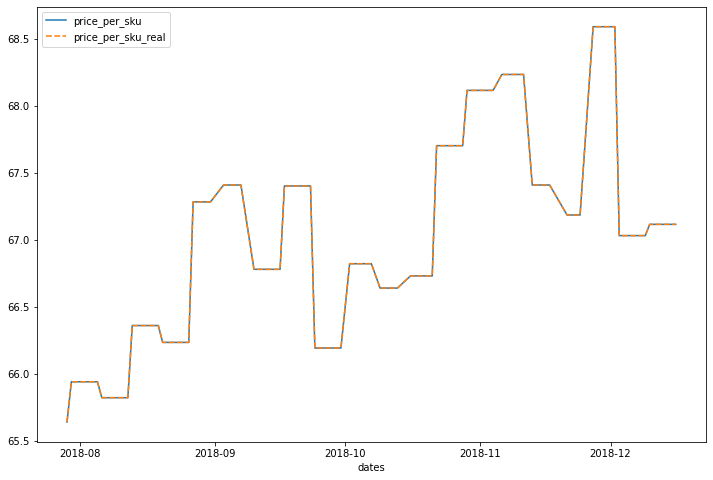

In [159]:
plt.figure(figsize=(12,8))
sns.lineplot(data=sku_98255_pivot)

In [160]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from pandas.plotting import autocorrelation_plot

import pmdarima

import tsfresh

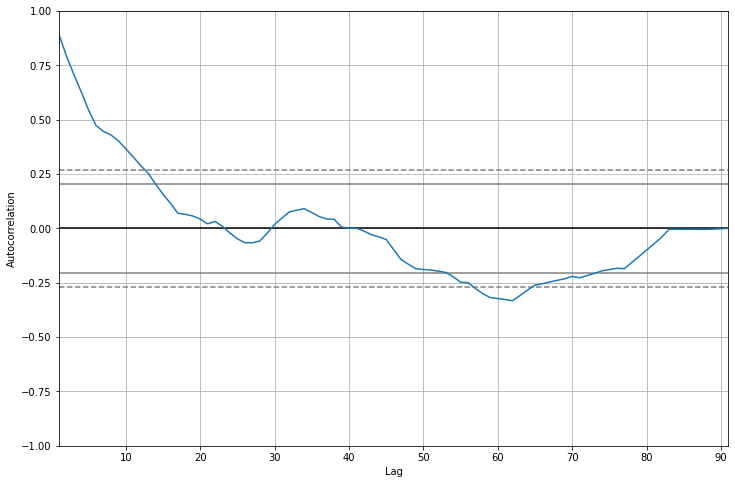

In [161]:
plt.figure(figsize=(12,8))
autocorrelation_plot(sku_98255.price_per_sku.values)

In [162]:
# # %%time
# pm_auro1 = pmdarima.auto_arima(y = sku_98255['price_per_sku'], n_fits=1000, X = pd.to_datetime(sku_98255[['dates']]))
# # pm_auro1.predict(start = len(sku_98255), end = len(sku_98255) + len(sku_98255_test) - 1, n_periods=7)
# pm_auro1.predict(X=pd.to_datetime(sku_98255_test[['dates']]), n_periods=7)

In [163]:
sku_98255['price_per_sku'][:-10]

dates
2018-07-29    65.639
2018-07-30    65.940
2018-07-31    65.940
2018-08-02    65.940
2018-08-04    65.940
               ...  
2018-11-24    67.186
2018-11-27    68.593
2018-11-28    68.593
2018-11-29    68.593
2018-11-30    68.593
Name: price_per_sku, Length: 81, dtype: float64

In [121]:
%%time
pm_auro1 = pmdarima.auto_arima(y = sku_98255['price_per_sku_real'][:-10], n_fits=100,
    max_p=15, max_d=15, max_q=15, start_p=1, start_q=1, start_P=5, start_Q=5, m=7, information_criterion='oob',
    max_P=12, max_D=12, max_order=15, trace=True, maxiter=3)
print(pm_auro1.summary())
pm_auro1.predict(n_periods=7, )

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(3,1,3)(3,0,3)[7] intercept   : AIC=68.228, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=46.361, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=49.478, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=49.443, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=45.450, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=47.494, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=47.467, Time=0.09 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=49.510, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=48.348, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=48.345, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=49.950, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 2.222 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   81
Model:            

array([68.593, 68.593, 68.593, 68.593, 68.593, 68.593, 68.593])

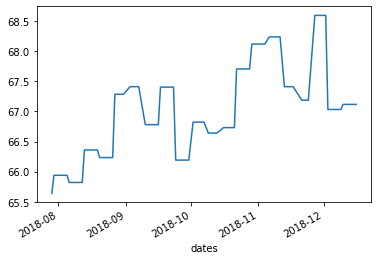

In [73]:
sku_98255['price_per_sku'].plot()

In [94]:
# Seasonal Autoregressive Integrated Moving-Average 
SARIMA = SARIMAX(sku_98255.price_per_sku.values, order=(13,1,13), seasonal= (0,0,0,0))
SARIMA_model = SARIMA.fit()

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [96]:
SARIMA_model.predict(start =len(sku_98255), end= len(sku_98255) + len(sku_98255_test)-1)

array([67.14716295, 67.07363209, 66.88103754, 66.75168021, 66.92303856,
       66.94552969, 66.85301919])

In [91]:
sku_98255.price_per_sku.values

array([65.639, 65.94 , 65.94 , 65.94 , 65.94 , 65.94 , 65.821, 65.821,
       65.821, 65.821, 65.821, 65.821, 66.36 , 66.36 , 66.36 , 66.36 ,
       66.36 , 66.36 , 66.234, 66.234, 66.234, 67.284, 67.284, 67.284,
       67.284, 67.284, 67.41 , 67.41 , 67.41 , 67.41 , 66.78 , 66.78 ,
       66.78 , 66.78 , 66.78 , 66.78 , 67.403, 67.403, 66.192, 66.192,
       66.192, 66.192, 66.192, 66.822, 66.822, 66.822, 66.822, 66.64 ,
       66.64 , 66.64 , 66.64 , 66.64 , 66.731, 66.731, 66.731, 67.704,
       67.704, 67.704, 67.704, 68.117, 68.117, 68.117, 68.117, 68.117,
       68.117, 68.117, 68.236, 68.236, 68.236, 68.236, 67.41 , 67.41 ,
       67.41 , 67.41 , 67.186, 67.186, 67.186, 68.593, 68.593, 68.593,
       68.593, 68.593, 68.593, 67.032, 67.032, 67.032, 67.032, 67.032,
       67.116, 67.116, 67.116])

## explore 1 sku 68211

In [100]:
## 1.2 ## explore 1 sku 68211

sku_68211 = ttl_sku_df.loc[ttl_sku_df.SKU == 68211]
sku_68211_test = test_df.loc[test_df.SKU == 68211]
sku_68211_pivot = sku_68211.pivot_table(index='dates', values=['price_per_sku', 'price_per_sku_real'], columns='SKU')
sku_68211_pivot.head()

,price_per_sku,price_per_sku_real
SKU,68211,68211
dates,,
2018-03-07,160.008,160.008
2018-03-08,160.008,160.008
2018-03-11,160.008,160.008
2018-03-12,160.190,160.190
2018-03-14,160.190,160.190


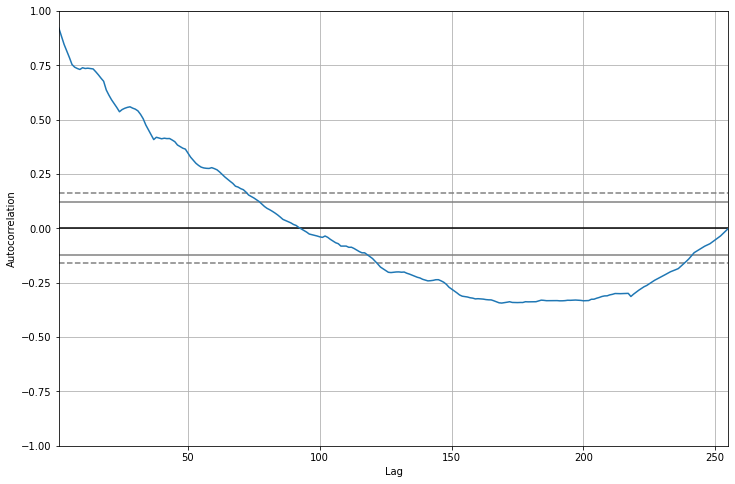

In [107]:
plt.figure(figsize=(12,8))
autocorrelation_plot(sku_68211.price_per_sku_real.values)

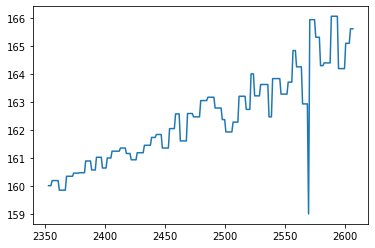

In [106]:
sku_68211['price_per_sku_real'].plot()

In [127]:
# %%time
# pm_auro1 = pmdarima.auto_arima(y = sku_68211['price_per_sku_real'][:-10], n_fits=100,
#     max_p=15, max_d=15, max_q=15, start_p=1, start_q=1, start_P=5, start_Q=5, m=7, information_criterion='oob',
#     max_P=12, max_D=12, max_Q=12, max_order=15,
# #     stepwise=False, 
#     trace=True, maxiter=3)
# print(pm_auro1.summary())
# pm_auro1.predict(n_periods=10)

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=433.661, Time=2.17 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=445.071, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=422.717, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=416.873, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=443.271, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=417.202, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=418.506, Time=0.10 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=416.881, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=416.669, Time=0.08 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=417.297, Time=0.19 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=418.656, Time=0.23 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=447.020, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=418.504, Time=0.12 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=417.304, Time=0.11 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=419.8

array([164.26705206, 164.26705206, 164.26705206, 164.26705206,
       164.4790387 , 164.4790387 , 164.4790387 , 164.469959  ,
       164.469959  , 164.469959  ])

In [ ]:
%%time
pm_auro1 = pmdarima.auto_arima(y = sku_68211['price_per_sku_real'][:-10], n_fits=100,
    max_p=15, max_d=15, max_q=15, start_p=1, start_q=1, start_P=5, start_Q=5, m=7, information_criterion='oob',
    max_P=12, max_D=12, max_order=15, trace=True, maxiter=3)
print(pm_auro1.summary())
pm_auro1.predict(n_periods=10)

# Data preparetion

In [230]:
sku_to_predict = test_df.SKU.unique()

In [231]:
sku_to_predict

array([98255, 68211, 60870, 32950, 24125, 69997, 57561, 78833, 43678,
       11050, 72784, 64619, 17812, 83329, 89272, 90611, 36096, 80631,
       54404, 84395, 19632, 38767, 80308, 10334, 49661])

In [232]:
test_df['predict'] = 0
test_df.head()

,dates,SKU,predict
0,2018-12-17,98255,0
1,2018-12-21,98255,0
2,2018-12-22,98255,0
3,2018-12-23,98255,0
4,2018-12-24,98255,0


In [235]:
test_df.shape

(175, 3)

In [236]:
%%time

for sku_i in sku_to_predict:
    # subset train df
    cur_train_df = ttl_sku_df.loc[ttl_sku_df.SKU == sku_i, ] 

    # fit auto sarima
    cur_auto_1 = pmdarima.auto_arima(y = cur_train_df['price_per_sku_real'], n_fits=100,
        max_p=15, max_d=15, max_q=15, start_p=1, start_q=1, start_P=5, start_Q=5, m=7, information_criterion='oob',
        max_P=12, max_D=12, max_Q=12, max_order=15, trace=True, maxiter=3)
    
    # get len of predict from test_df
    frcst_len = len(test_df.loc[test_df.SKU == sku_i, ])
    
    # add predict to test_df
    test_df.loc[test_df.SKU == sku_i, 'predict'] = cur_auto_1.predict(n_periods=frcst_len)
    
    
    
    

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=85.729, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=65.900, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=69.504, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=69.492, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=64.107, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=67.518, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=67.508, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=69.629, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=67.899, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=67.899, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=69.782, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 1.415 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=443.553, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=455.937, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=432.901, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=426.994, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=454.292, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=427.675, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=428.518, Time=0.12 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=426.963, Time=0.22 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=428.959, Time=0.25 sec
 ARIMA(0,1,1)(0,0,3)[7] intercept   : AIC=428.551, Time=0.37 sec
 ARIMA(0,1,1)(1,0,3)[7] intercept   : AIC=430.604, Time=0.43 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=458.313, Time=0.17 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=428.635, Time=0.21 sec
 ARIMA(0,1,2)(0,0,2)[7] intercept   : AIC=427.522, Time=0.26 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=433.556, Time=0.18 sec
 ARIMA(1,1,2)(0,0,2)[7] i

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=-390.027, Time=7.34 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-413.253, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-409.637, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-409.642, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-412.888, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-411.626, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-411.631, Time=0.22 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-409.631, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-411.261, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-411.261, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-409.256, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7] intercept
Total fit time: 8.726 seconds


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=878.604, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=855.714, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=859.360, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=859.371, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=854.069, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=857.589, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=857.571, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=859.577, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=857.455, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=857.471, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=859.628, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 1.683 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=4.536, Time=3.45 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-19.466, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-15.466, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-15.466, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-21.211, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-17.466, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-17.466, Time=0.10 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-15.466, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-17.466, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-17.466, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-15.466, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 4.499 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=84.623, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=70.627, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=74.626, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=74.627, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=68.628, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=72.626, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=72.626, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=74.626, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=72.627, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=72.627, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=74.627, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 1.011 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=700.562, Time=4.59 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=693.948, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=683.635, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=682.515, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=692.450, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=681.147, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=682.511, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=684.520, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=682.817, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=682.697, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=682.102, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=685.286, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=680.012, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=681.488, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=681.481, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[7]  

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=533.639, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=513.987, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=517.857, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=517.840, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=512.025, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=515.877, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=515.867, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=517.889, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=515.933, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=515.913, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=516.717, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 1.148 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=605.669, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=608.399, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=608.353, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=603.779, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=606.509, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=606.486, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=608.486, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=607.668, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=607.668, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=609.668, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 2.700 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=635.519, Time=20.37 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=707.812, Time=0.25 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=622.561, Time=0.96 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=618.896, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=706.287, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=616.994, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=618.891, Time=0.57 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=620.893, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=618.990, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=618.989, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=620.771, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=624.436, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=615.796, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=617.676, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=617.676, Time=0.45 sec
 ARIMA(0,1,1)(1,0,1)[7] 

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=833.196, Time=8.84 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=840.920, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=829.243, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=828.190, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=839.605, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=830.922, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=830.200, Time=0.48 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=829.930, Time=0.71 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=828.137, Time=0.29 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=830.082, Time=0.73 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=832.154, Time=1.50 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=839.396, Time=0.13 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=829.282, Time=0.56 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=827.946, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=831.952, Time=0.12 sec
 ARIMA(0,1,2)(2,0,0)[7] i

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,0,1)(5,0,5)[7] intercept   : AIC=295.336, Time=3.81 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=346.027, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=277.146, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=299.370, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1315.415, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=275.143, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=277.143, Time=0.15 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=274.257, Time=0.05 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=276.257, Time=0.24 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=276.257, Time=0.12 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=271.790, Time=0.11 sec
 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=273.789, Time=0.58 sec
 ARIMA(3,0,0)(0,0,1)[7] intercept   : AIC=273.790, Time=0.24 sec
 ARIMA(3,0,0)(1,0,1)[7] intercep

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=645.690, Time=5.33 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=641.357, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=632.096, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=630.630, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=639.642, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=632.243, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=632.626, Time=0.41 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=632.606, Time=0.74 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=630.588, Time=0.18 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=632.588, Time=1.05 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=634.588, Time=0.83 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=642.406, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=631.290, Time=0.30 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=631.291, Time=0.18 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=630.115, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[7] i

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=704.184, Time=5.58 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=693.828, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=687.425, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=687.128, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=692.088, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=688.677, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=687.684, Time=0.17 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=686.785, Time=0.35 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=689.020, Time=0.56 sec
 ARIMA(0,1,1)(0,0,3)[7] intercept   : AIC=688.719, Time=0.87 sec
 ARIMA(0,1,1)(1,0,3)[7] intercept   : AIC=690.782, Time=1.24 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=694.203, Time=0.43 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=688.637, Time=0.70 sec
 ARIMA(0,1,2)(0,0,2)[7] intercept   : AIC=687.156, Time=0.76 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=687.901, Time=0.38 sec
 ARIMA(1,1,2)(0,0,2)[7] i

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=102.995, Time=15.48 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=88.906, Time=0.23 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=92.874, Time=0.79 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=92.893, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=87.452, Time=0.20 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=90.874, Time=0.57 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=90.874, Time=0.53 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=92.945, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=90.906, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=90.906, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=92.906, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 20.199 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=1016.013, Time=7.35 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1010.489, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1009.180, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1008.530, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1008.655, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1008.515, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1009.031, Time=0.28 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1011.868, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1010.401, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=1010.360, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1008.601, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1012.484, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=1006.721, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=1007.281, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=1006.801, Time=0.19 sec
 ARIMA(0,1

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=218.859, Time=3.55 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=199.677, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=203.412, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=203.414, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=197.714, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=201.414, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=201.417, Time=0.10 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=203.414, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=201.677, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=201.677, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=203.541, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 4.612 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=304.007, Time=15.58 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=280.903, Time=0.15 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=284.903, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=284.903, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=279.092, Time=0.08 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=282.903, Time=0.22 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=282.903, Time=0.32 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=284.903, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=282.903, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=282.903, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=284.903, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 18.528 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=384.371, Time=20.89 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=460.802, Time=0.19 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=372.074, Time=0.68 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=365.683, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=459.044, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=364.139, Time=0.19 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=365.605, Time=0.55 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=367.664, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=365.840, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=365.715, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=370.430, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=368.083, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=362.556, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=364.004, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=363.995, Time=0.52 sec
 ARIMA(0,1,1)(1,0,1)[7] 

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=-546.643, Time=19.95 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-569.539, Time=0.48 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-565.546, Time=0.71 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-565.546, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-570.659, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-567.546, Time=0.48 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-567.546, Time=0.98 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-565.550, Time=0.64 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-567.540, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-567.540, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-565.540, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 26.582 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=262.949, Time=10.92 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=238.950, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=242.950, Time=0.84 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=242.950, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=236.952, Time=0.08 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=240.950, Time=0.27 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=240.950, Time=0.54 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=242.950, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=240.950, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=240.950, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=242.950, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 14.381 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=825.016, Time=8.09 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=823.081, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=818.804, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=818.428, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=821.851, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=816.447, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=818.431, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=820.244, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=818.070, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=818.084, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=816.850, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=820.423, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=815.539, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=817.512, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=817.494, Time=0.27 sec
 ARIMA(0,1,1)(1,0,1)[7]  

/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=-443.140, Time=26.19 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-466.379, Time=0.37 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-462.795, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-462.803, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-468.119, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-464.795, Time=0.39 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-464.803, Time=1.36 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-462.778, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-464.379, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-464.379, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-462.379, Time=1.38 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 33.196 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=713.897, Time=8.13 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=702.007, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=703.133, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=703.044, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=700.545, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=701.276, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=701.175, Time=0.19 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=703.260, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=704.006, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=704.006, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=706.006, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 9.607 seconds
Performing stepwise search to minimize aic


/home/jupyter-e.kozhevnikov-1/.local/lib/python3.7/site-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


 ARIMA(1,1,1)(5,0,5)[7] intercept   : AIC=-41.779, Time=19.64 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-65.789, Time=0.18 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-61.789, Time=0.76 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-61.789, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-67.355, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-63.789, Time=0.24 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-63.789, Time=0.55 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-61.789, Time=0.89 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-63.789, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-63.789, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-61.789, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 24.052 seconds
CPU times: user 15min 9s, sys: 12min 50s, total: 27min 59s
Wall time: 6min


In [237]:
test_df.columns = ['dates', 'SKU', 'price_per_sku']

In [238]:
test_df.head()

,dates,SKU,price_per_sku
0,2018-12-17,98255,67.116
1,2018-12-21,98255,67.116
2,2018-12-22,98255,67.116
3,2018-12-23,98255,67.116
4,2018-12-24,98255,67.116


In [239]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          175 non-null    object 
 1   SKU            175 non-null    int64  
 2   price_per_sku  175 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [240]:
test_df.describe()

,SKU,price_per_sku
count,175.000000,175.000000
mean,56727.400000,138.354849
std,26456.220602,79.420896
min,10334.000000,67.116000
25%,36096.000000,92.257000
50%,60870.000000,119.568000
75%,80308.000000,149.710000
max,98255.000000,454.175000


In [241]:
test_df.to_csv('prediction.csv', index=False)